<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
!pip install pyupbit

In [67]:
import pyupbit

In [68]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-mana", interval="minute30")
df

,open,high,low,close,volume,value
2021-10-28 06:30:00,950.0,957.0,950.0,957.0,1.336303e+05,1.275505e+08
2021-10-28 07:00:00,955.0,958.0,944.0,946.0,3.490221e+05,3.317678e+08
2021-10-28 07:30:00,949.0,949.0,937.0,942.0,2.688453e+05,2.532158e+08
2021-10-28 08:00:00,944.0,948.0,935.0,937.0,3.854727e+05,3.629591e+08
2021-10-28 08:30:00,937.0,937.0,925.0,928.0,8.327710e+05,7.748749e+08
...,...,...,...,...,...,...
2021-11-01 08:00:00,3255.0,3340.0,3185.0,3255.0,3.923618e+06,1.277277e+10
2021-11-01 08:30:00,3255.0,3455.0,3250.0,3400.0,6.477722e+06,2.171094e+10
2021-11-01 09:00:00,3400.0,3565.0,3260.0,3405.0,2.746485e+07,9.443720e+10
2021-11-01 09:30:00,3405.0,3650.0,3350.0,3375.0,1.826865e+07,6.412892e+10


In [69]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2021-10-28 06:30:00,957.0
1,2021-10-28 07:00:00,946.0
2,2021-10-28 07:30:00,942.0
3,2021-10-28 08:00:00,937.0
4,2021-10-28 08:30:00,928.0
...,...,...
195,2021-11-01 08:00:00,3255.0
196,2021-11-01 08:30:00,3400.0
197,2021-11-01 09:00:00,3405.0
198,2021-11-01 09:30:00,3375.0


In [70]:
#prophet 불러옴
from fbprophet import Prophet

In [71]:
model = Prophet(
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.5,
    changepoint_range=0.9,
)
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [72]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=7, freq='H')
forecast = model.predict(future)

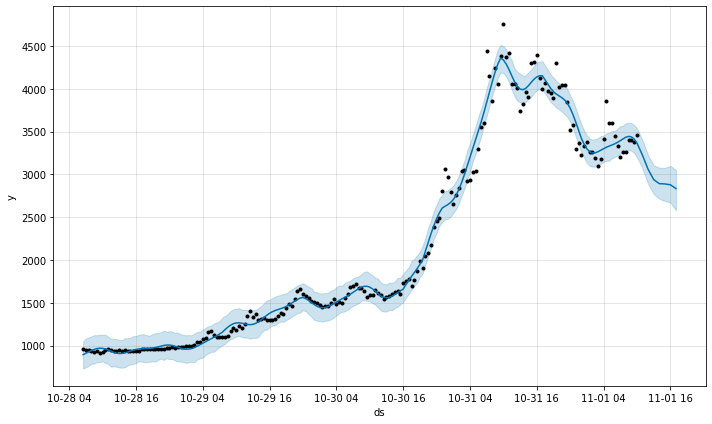

In [73]:
#그래프1
fig1 = model.plot(forecast)


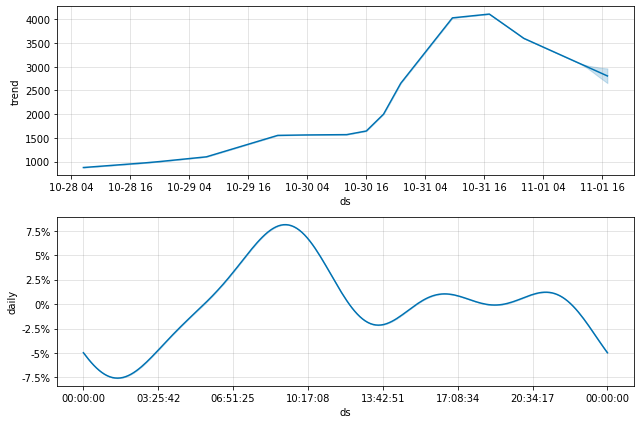

In [74]:
#그래프2
fig2 = model.plot_components(forecast)